In [609]:
import numpy as np
import random
import time
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [615]:
# returns all edges for a given index (int, int) given an existing shape
def find_edges(index, shape, discriminant = 0):
    
    top = (index[0], index[1]-1)
    bottom = (index[0], index[1]+1)
    left = (index[0]-1, index[1])
    right = (index[0]+1, index[1])
    
    e = [top, bottom, left, right]
    e_found = []
    # checks whether the edges fit in the nXn grid & whether the supposed edge is, in fact, filled in
    for edge in e:  
        valid = True
        for i in edge:
            if i < 0 or i > shape.shape[0]-1:
                #e.remove(edge)
                valid = False
                break
                
        if valid and shape[edge] > discriminant:
            #e.remove(edge)
            continue
            
        if valid:
            e_found.append(edge)
    
    return e_found


# returns an image that represents shape (2D np array)
# color is a list representing RGB
# res is an (int, int) tuple storing the x and y multipliers for the array size
def shape_as_image(shape, res = (64, 64), random_color = False):
    # generates colors for each unique value seen in the matrix
    colors = [[0, 0, 0, 0]]
    comp_values = [0]
    for v in shape.flatten():
        new_value = True
        for c in comp_values:
            if v == c:
                new_value = False
                break
        
        if new_value:
            comp_values.append(new_value)
            colors.append([random.randint(0,255)
                           , random.randint(0,255)
                           , random.randint(0,255)
                           , 255])
            
    # generates a new shape based on res which adds an extra dimension for color
    new_shape = np.zeros((shape.shape[0]*res[1], shape.shape[1]*res[0], 4), dtype=np.uint8)
    
    # colors in each block of pixels that corresponds to a value greater than 0 in shape
    for r in range(len(shape)):
        for i in range(len(shape[r])):
            if shape[r][i] > 0:
                color = colors[int(shape[r][i])]
                if random_color:
                    color = [random.randint(0,255), random.randint(0,255), random.randint(0,255), 255]
                for row in new_shape[r*res[1]:r*res[1]+res[1]]:
                    row[i*res[0]:i*res[0]+res[0]] = color
    
    return Image.fromarray(new_shape, 'RGBA')



In [616]:
# randomly generates a shape given a grid_size (int) and number of generations (int)
def organic_shape(grid_size = 8, generations = 5, save_gif = False):
    # initializes matrix of zeros to store the shape
    shape = np.zeros((grid_size, grid_size))

    # stores edges for each generative pass
    edges = []

    # chooses a random starting point (int, int) for generation
    start_index = (random.randint(0,7), random.randint(0,7))
    shape[start_index] += 1

    # locates and adds starting edges to the edges list
    for e in find_edges(start_index, shape):
        edges.append(e)
    
    #stores frames for gif
    frames = []
    
    # generates shape body over a specified number of passes (generations (int))
    for z in range(generations): 
        if len(edges) < 1:
            break

        # used to store the new edges which will used to update edges at the end of each pass
        temp_edges = []

        # generates a random selection of edges which will become part of the body
        inds = [random.randint(0,len(edges)-1) for x in range(len(edges))]

        # adds body at all selected edges in inds
        for x in inds:
            # catches doubles created in inds
            if shape[edges[x]] < 1:
                shape[edges[x]] += 1
                # finds and adds new edges to temp_edges
                for e in find_edges(edges[x], shape):
                    temp_edges.append(e)

        edges = temp_edges[:]
        
        if save_gif:
            # adds current shape as image to frames list
            frames.append(shape_as_image(shape, random_color = False))
    
    if save_gif:
        # saves a gif of all frames in frames list
        frames[0].save('./organic_shpes.gif', save_all=True
                       , append_images=frames[1:], optimize=False, duration=200, loop=0)
    
    return shape

In [617]:
# retruns a distribution of subshapes of size two, three, and four given a shape matrix
# returns [# of 2 unit shapes, # of 3 unit shapes, # of 4 unit shapes]
def distribute_numbers(shape):
    # counts the number of units that make up shape
    count = len([v for v in shape])
    
    # randomized percentages of 3-4 unit shapes
    a = random.randint(0,100)
    b = 100-a
    percents = [a, b]
    
    dist = [int(np.round(count*(percents[0]/100))), 
            int(np.round(count*(percents[1]/100)))]

    dist_sum = sum(dist)

    if dist_sum < count:
        dist[random.randint(0,1)] += 1
    elif dist_sum > count:
        dist[random.randint(0,1)] -= 1
        
    return dist


In [618]:
shape = organic_shape(8, 6, save_gif = False)

dist = distribute_numbers(shape)
print(dist)

def make_subshapes(shape, unit_size, count, identifier):
    ones = []
    for y in range(len(shape)):
        for x in range(len(shape[y])):
            if shape[(x, y)] == 1:
                ones.append((x, y))
                
    for x in range(count):
        current_index = ones[random.randint(0, len(ones)-1)]
        shape[current_index] = identifier
        ones.remove(current_index)
        for x in range(unit_size-1):
            edges = [e for e in find_edges(current_index, shape,  1) if shape[e] == 1]
            
        
    return shape
        
make_subshapes(shape, 3, dist[0], 2)

[1, 7]


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 2., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.]])

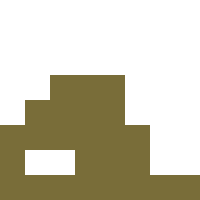

In [623]:
shape = organic_shape(8, 6, save_gif = False)
shape_as_image(shape, res = (25, 25), random_color = False)

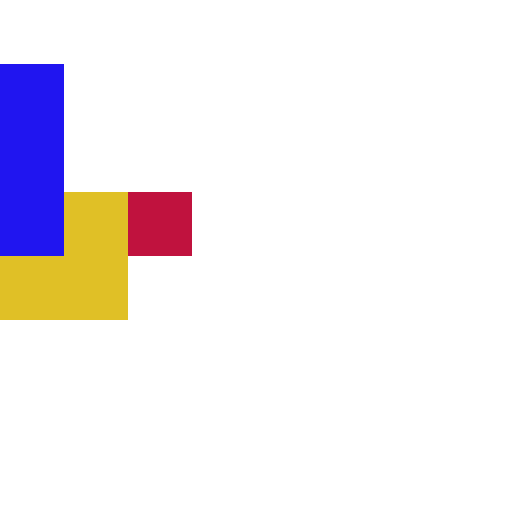

In [680]:
shape = organic_shape(8, 3, save_gif = False)
save_gif = True

# returns the true if tup0 (int, int) borders tup1 (int, int)
def is_bordering(tup0, tup1):
    # find the magnitude of difference between the x & y values
    x_diff = np.abs(tup0[0] - tup1[0])
    y_diff = np.abs(tup0[1] - tup1[1])
    # uses calculated diffs to 
    if x_diff == 1 and y_diff == 0:
        return True
    elif y_diff == 1 and x_diff == 0:
        return True
    else:
        return False

frames = []

if save_gif:
    # adds current shape as image to frames list
    frames.append(shape_as_image(shape, random_color = False))

for z in range(100):
    ones = []
    for y in range(len(shape)):
        for x in range(len(shape[y])):
            if shape[(x, y)] == 1:
                ones.append((x, y))
    
    if len(ones) == 0:
        break
        
    pick = ones[random.randint(0, len(ones)-1)]
    shape[pick] += z+1
    ones.remove(pick)
    
    for i in range(2):
        random.shuffle(ones)
        borders = []
        for one in ones:
            if is_bordering(pick, one):
                if shape[one] == 1:
                    borders.append(one)
        
        random.shuffle(borders)
        if len(borders) > 0:
            for j in range(random.randint(1, len(borders))):
                shape[borders[j]] += z+1
                try:
                    np.delete(ones, borders[j])
                except:
                    print(borders[j], ones)

            pick = borders[0]
            
    if save_gif:
        # adds current shape as image to frames list
        frames.append(shape_as_image(shape, random_color = False))
    
if save_gif:
    # saves a gif of all frames in frames list
    frames[0].save('./organic_subdivisions.gif', save_all=True
                   , append_images=frames[1:], optimize=False, duration=200, loop=0)

shape_as_image(shape)

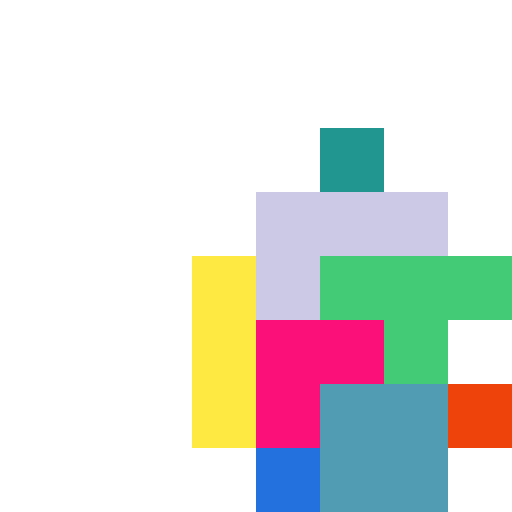

In [669]:
shape_as_image(shape)

In [651]:
shape

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 4., 0., 0., 0., 0.],
       [2., 4., 4., 4., 0., 0., 0., 0.],
       [2., 2., 3., 3., 3., 8., 0., 0.],
       [2., 2., 3., 3., 5., 0., 0., 0.],
       [2., 6., 6., 7., 5., 5., 0., 0.],
       [6., 6., 6., 5., 5., 0., 0., 0.]])

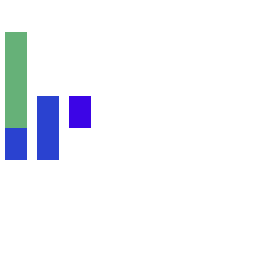

In [690]:
res = (32, 32)

# generates colors for each unique value seen in the matrix
colors = [[0, 0, 0, 0]]
comp_values = [0]
for v in shape.flatten():
    new_value = True
    for c in comp_values:
        if v == c:
            new_value = False
            break

    if new_value:
        comp_values.append(new_value)
        colors.append([random.randint(0,255)
                       , random.randint(0,255)
                       , random.randint(0,255)
                       , 255])

# generates a new shape based on res which adds an extra dimension for color
new_shape = np.zeros((shape.shape[0]*res[1], shape.shape[1]*res[0], 4), dtype=np.uint8)

# colors in each block of pixels that corresponds to a value greater than 0 in shape
for r in range(len(shape)):
    for i in range(len(shape[r])):
        if shape[r][i] > 0:
            color = colors[int(shape[r][i])]
            for row in new_shape[r*res[1]:r*res[1]+res[1]]:
                row[i*res[0]:i*res[0]+res[0]] = color
            for row in new_shape[r*res[1]:r*res[1]+res[1]]:
                row[i*res[0]:i*res[0]+5] = [0,0,0,0]
                row[i*res[0]+res[0]-5:i*res[0]+res[0]] = [0,0,0,0]
            

Image.fromarray(new_shape, 'RGBA')